In [2]:
#Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details
#of customers to predict customer response for special offers.
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
heart_df =pd.read_csv('Heart.csv')
admission_df = pd.read_csv("admission.csv")

In [10]:
heart_df.head(), admission_df.head()

(   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
 0           1   63    1       typical     145   233    1        2    150   
 1           2   67    1  asymptomatic     160   286    0        2    108   
 2           3   67    1  asymptomatic     120   229    0        2    129   
 3           4   37    1    nonanginal     130   250    0        0    187   
 4           5   41    0    nontypical     130   204    0        2    172   
 
    ExAng  Oldpeak  Slope   Ca        Thal  AHD  
 0      0      2.3      3  0.0       fixed   No  
 1      1      1.5      2  3.0      normal  Yes  
 2      1      2.6      2  2.0  reversable  Yes  
 3      0      3.5      3  0.0      normal   No  
 4      0      1.4      1  0.0      normal   No  ,
    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0           1        337          118                  4  4.5   4.5  9.65   
 1           2        324          107                  4  4.0   4.5  8.87   
 

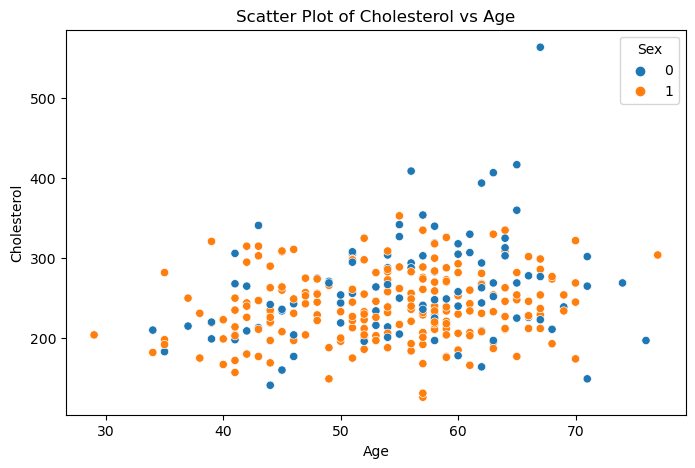

In [11]:
#To plot scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(x=heart_df['Age'], y=heart_df['Chol'], hue=heart_df['Sex'])
plt.title("Scatter Plot of Cholesterol vs Age")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()
# scatter plot

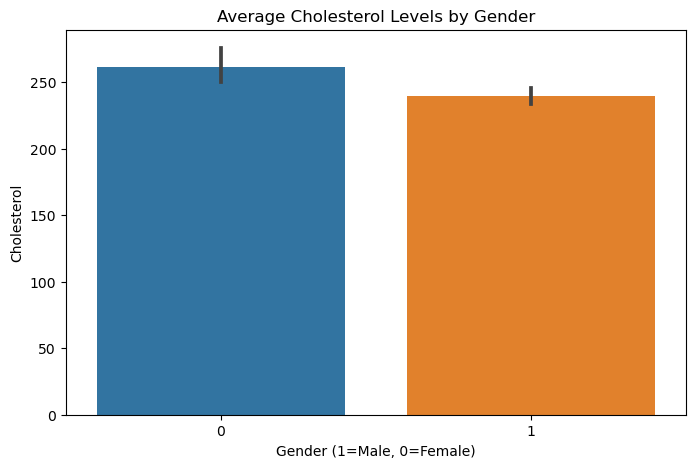

In [12]:
#To plot bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=heart_df['Sex'], y=heart_df['Chol'])
plt.title("Average Cholesterol Levels by Gender")
plt.xlabel("Gender (1=Male, 0=Female)")
plt.ylabel("Cholesterol")
plt.show()
# bar plot

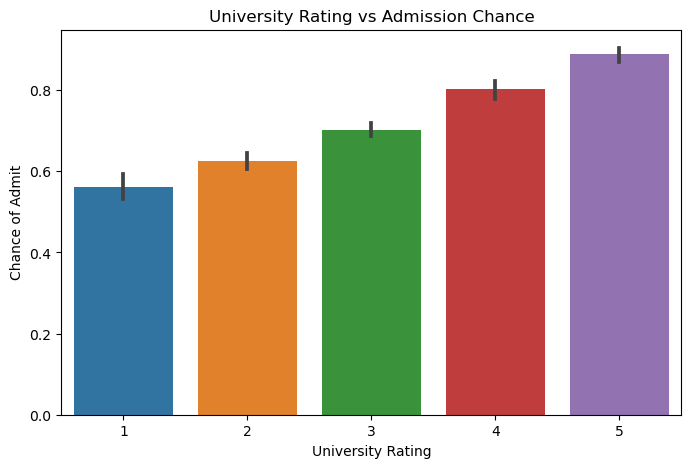

In [13]:
#To plot bar
plt.figure(figsize=(8,5))
sns.barplot(x=admission_df['University Rating'], y=admission_df['Chance of Admit '])  # Note the space at the end
plt.title("University Rating vs Admission Chance")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.show()

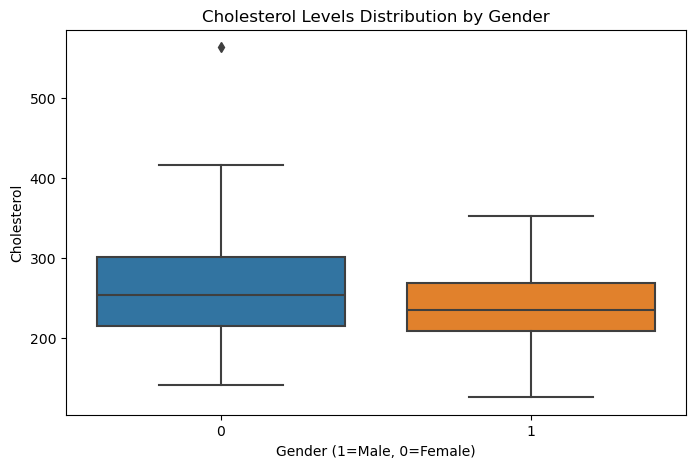

In [14]:
#To plot box
plt.figure(figsize=(8,5))
sns.boxplot(x=heart_df['Sex'], y=heart_df['Chol'])
plt.title("Cholesterol Levels Distribution by Gender")
plt.xlabel("Gender (1=Male, 0=Female)")
plt.ylabel("Cholesterol")
plt.show()

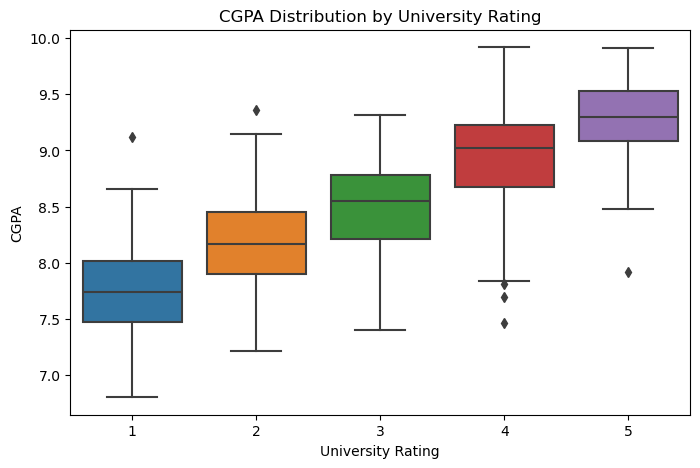

In [15]:
#To plot box
plt.figure(figsize=(8,5))
sns.boxplot(x=admission_df['University Rating'], y=admission_df['CGPA'])
plt.title("CGPA Distribution by University Rating")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()


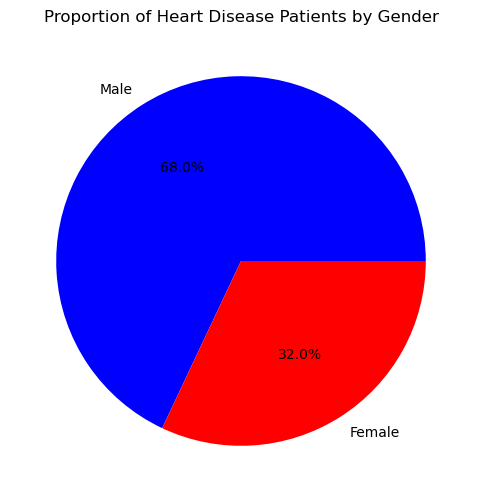

In [16]:
#To plot pie chart
gender_counts = heart_df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Proportion of Heart Disease Patients by Gender")
plt.show()

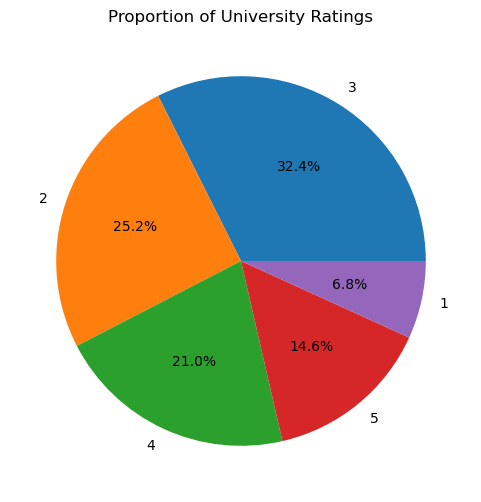

In [17]:
#To plot pie chart
rating_counts = admission_df['University Rating'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title("Proportion of University Ratings")
plt.show()


C:\Users\rutuj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rutuj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


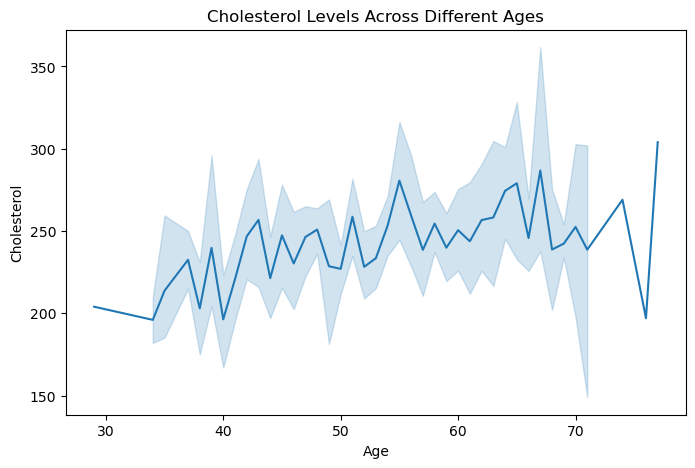

In [18]:
#To line plot 
plt.figure(figsize=(8,5))
sns.lineplot(x=heart_df['Age'], y=heart_df['Chol'])
plt.title("Cholesterol Levels Across Different Ages")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

In [37]:
# Split Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Make Predictions
y_pred = model.predict(X_test)


In [40]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

